# Standardization

Z-score standardization (Standardization): This method transforms the data so that it has a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean of the feature from each data point and then dividing it by the standard deviation. The formula for z-score standardization is:

x' = (x - mean) / standard deviation

Here, x is the original value, x' is the standardized value, mean is the mean of the feature, and standard deviation is the standard deviation of the feature.

Z-score standardization is useful when the distribution of the feature is approximately Gaussian (bell-shaped) or when we want to compare values based on their deviation from the mean.

# Why scaling is important?
it impact: 

Kmean: use the euclidean distance measure

KNN: measue the distances between the pairs of samples and these distances are influenced by the measurement units.

PCA: try to get the feature with maximum variance.

artificial neural network: apply Gradient descent.

Gradient descent : theta calculation becomes faster after feature scaling and the learning rate in the update of equation of stochastic gradient descent is the same for every parameter.
    
Scaling does not impact on decision tree beacuse it does not work on distance.

# Normalization:
The purpose of normalization is to eliminate or reduce the effects of differences in the scales or units of measurement of different variables.

## Type of normalization
### Min-Max normalization :
Scaling data between 0 and 1. 

normalized_value = (value - min_value) / (max_value - min_value).

Here we are squashing data in beyween 0 to 1 so impact of outlier will also squish But this method effect the outlier and scale the outlier data in range between 0 and 1.

It is useful when you know the min max value. eg. image processing (CNN).we know the min pixel and max pixel.

### mean normalization:
normalized_value = (value - mean_value) / (max_value - min_value) 

Here we are doing mean centering and scaling in range betweein -1 to 1.

It is useful when we need centered data. but we can achieve this by standardization. so this technoque is not popular.

### max absolute scaling :
Values are scaled between -1 and 1, while preserving the sign (positive or negative) of the original values. 

normalized_value = value / abs(max_value) 

Useful in sparse data.

### Robust scaling :
This technique is designed to be robust to outliers or extreme values in the dataset. It scales the data by subtracting the median and dividing by the interquartile range (IQR = 75th percentile value - 25th percentile value). 

normalized_value = (value - median) / IQR 

Robust scaling is less affected by outliers.

Robust scaling assumes a symmetric distribution and may not be suitable for data that does not follow such a distribution.

# difference between normalization and standardization:
### Scaling Range:
Normalization scales data to a specific range, often between 0 and 1, whereas standardization transforms data to have a mean of 0 and a standard deviation of 1.

### Handling Outliers:
Normalization is sensitive to outliers since it uses the minimum and maximum values of the dataset. Standardization is more robust to outliers because it relies on the mean and standard deviation.

### Interpretation:
Normalized values represent the relative position of a data point within the range of the variable. Standardized values represent the number of standard deviations a data point is away from the mean. Standardized values allow for direct comparison of the relative position of data points across variables.

### Distribution Shape:
Normalization does not assume a specific distribution shape and can be used for any distribution. Standardization assumes a normal distribution or approximate normality, as it centers the data around the mean and scales it based on the standard deviation.



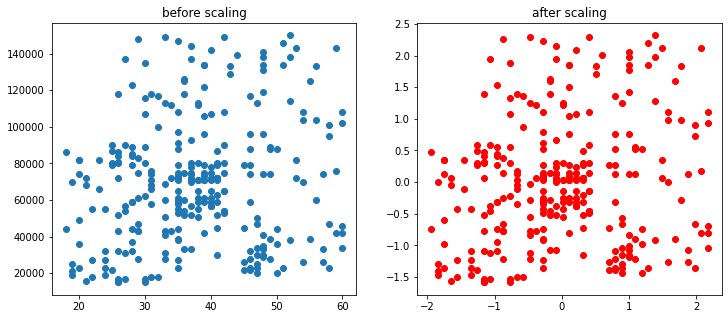

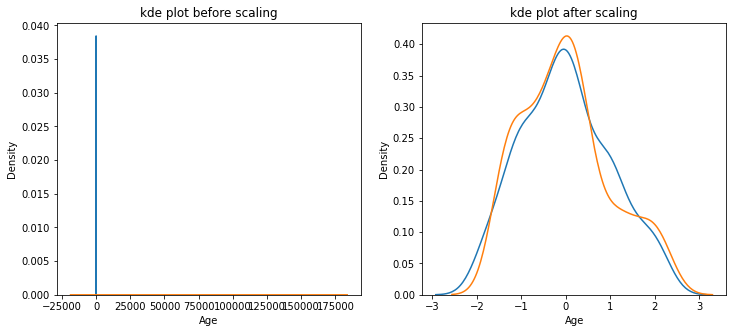

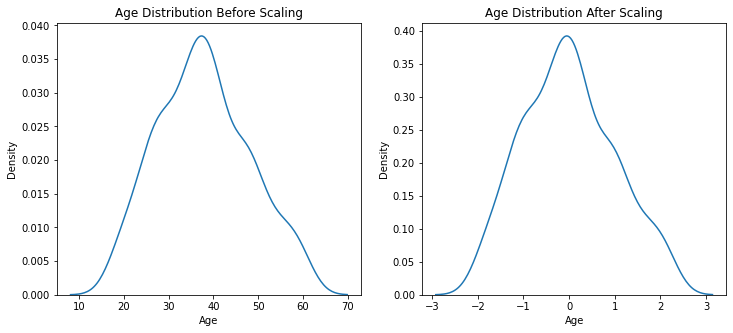

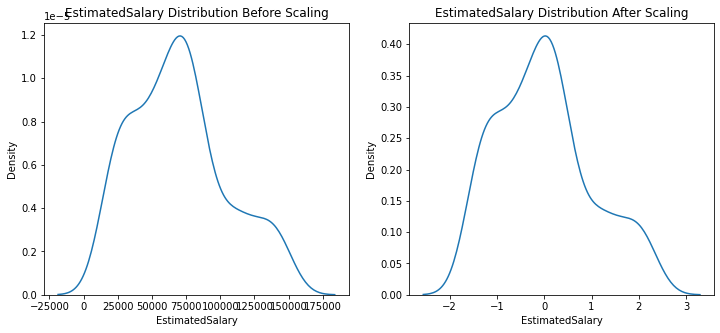

logistic regression performance using actual data :  0.6583333333333333
logistic regression performance using Scaled data or standardization :  0.8666666666666667


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_file(file_name):
    data = pd.read_csv(file_name)
    data = data.iloc[:,2:5]
    return data

class StandardScaler:
    def __init__(self):
        self.mean=None
        self.std=None
        
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X,axis=0)
        
    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted. Please call fit() first.")
        scaled_X = (X-self.mean)/self.std
        return scaled_X
    

def plot_graphs(X_train,X_train_scaled):
    #scatter plot for actual data and scaled data
    fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
    ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
    ax1.set_title('before scaling')
    ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
    ax2.set_title('after scaling')
    
    #kernel density estimation plot for actual data and scaled data
    fig, (a1, a2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Age'],ax=a1)
    sns.kdeplot(X_train['EstimatedSalary'],ax=a1)
    a1.set_title('kde plot before scaling')
    sns.kdeplot(X_train_scaled['Age'],ax=a2)
    sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=a2)
    a2.set_title('kde plot after scaling')
    plt.show()
    
    #kde plot for Age distribution before scaling and after scaling
    fig, (b1, b2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Age'],ax=b1)
    b1.set_title('Age Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['Age'],ax=b2)
    b2.set_title('Age Distribution After Scaling')
    plt.show()
    
    #kde plot for EstimatedSalary distribution before scaling and after scaling
    fig, (c1, c2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['EstimatedSalary'],ax=c1)
    c1.set_title('EstimatedSalary Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=c2)
    c2.set_title('EstimatedSalary Distribution After Scaling')
    plt.show()
    
    
def logistic_Regression_Using_actualData_and_standardizationData(data):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Purchased', axis=1),
                                                 data['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
    scale = StandardScaler()
    # fit the scale to the train set, it will learn the parameters i.e mean and std
    scale.fit(X_train)
    # transform train and test sets.we are centrise the mean by zero and making variance as 1
    X_train_scaled = scale.transform(X_train)
    X_test_scaled = scale.transform(X_test)
    
    plot_graphs(X_train,X_train_scaled)
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr_scaled = LogisticRegression()
    
    lr.fit(X_train,Y_train)
    lr_scaled.fit(X_train_scaled,Y_train)
    
    Y_pred = lr.predict(X_test)
    Y_pred_scaled = lr_scaled.predict(X_test_scaled)
    
    from sklearn.metrics import accuracy_score
    
    print("logistic regression performance using actual data : ",accuracy_score(Y_test,Y_pred))
    print("logistic regression performance using Scaled data or standardization : ",accuracy_score(Y_test,Y_pred_scaled))
    

    
data = read_csv_file('Social_Network_Ads.csv')
logistic_Regression_Using_actualData_and_standardizationData(data)

# Decision Tree
Scaling does not impact on decision tree beacuse it does not work on distance.

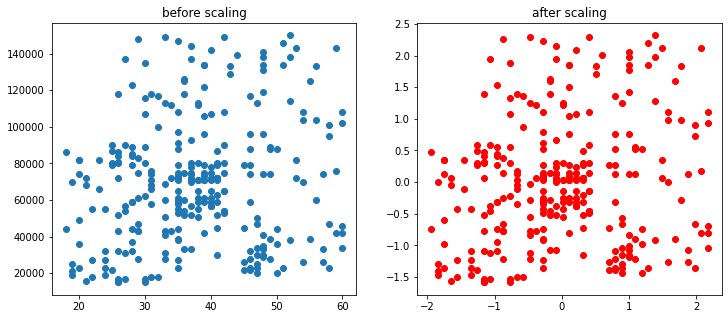

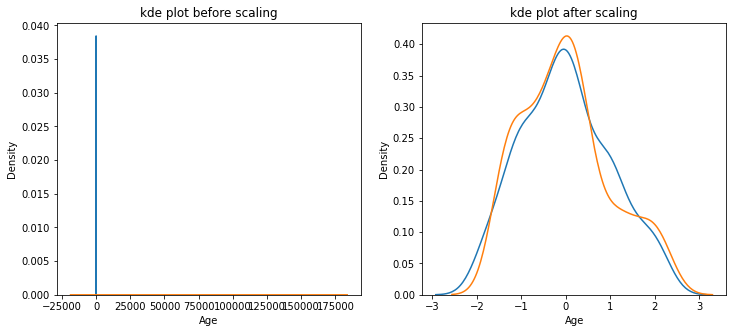

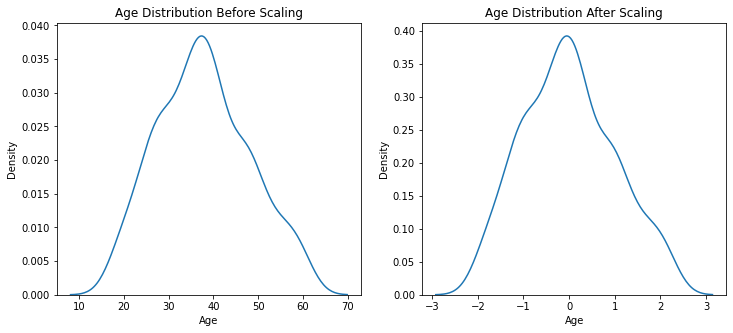

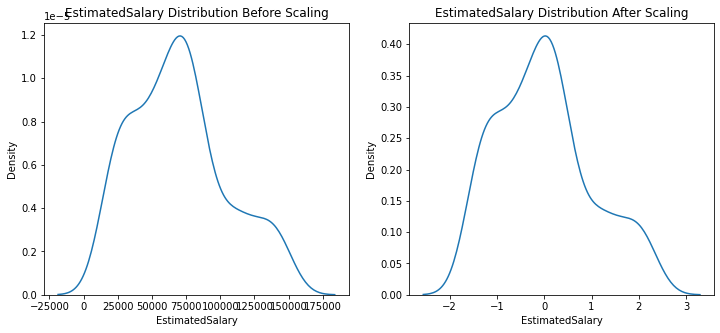

Decision Tree performance using actual data :  0.875
Decision Tree performance using standardization :  0.875
Scaling does not impact on decision tree beacuse it does not work on distance.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_file(file_name):
    data = pd.read_csv(file_name)
    data = data.iloc[:,2:5]
    return data

class StandardScaler:
    def __init__(self):
        self.mean=None
        self.std=None
        
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X,axis=0)
        
    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted. Please call fit() first.")
        scaled_X = (X-self.mean)/self.std
        return scaled_X
    

def plot_graphs(X_train,X_train_scaled):
    #scatter plot for actual data and scaled data
    fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
    ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
    ax1.set_title('before scaling')
    ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
    ax2.set_title('after scaling')
    
    #kernel density estimation plot for actual data and scaled data
    fig, (a1, a2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Age'],ax=a1)
    sns.kdeplot(X_train['EstimatedSalary'],ax=a1)
    a1.set_title('kde plot before scaling')
    sns.kdeplot(X_train_scaled['Age'],ax=a2)
    sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=a2)
    a2.set_title('kde plot after scaling')
    plt.show()
    
    #kde plot for Age distribution before scaling and after scaling
    fig, (b1, b2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Age'],ax=b1)
    b1.set_title('Age Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['Age'],ax=b2)
    b2.set_title('Age Distribution After Scaling')
    plt.show()
    
    #kde plot for EstimatedSalary distribution before scaling and after scaling
    fig, (c1, c2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['EstimatedSalary'],ax=c1)
    c1.set_title('EstimatedSalary Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=c2)
    c2.set_title('EstimatedSalary Distribution After Scaling')
    plt.show()
    
    
def decision_tree_Using_actualData_and_standardizationData(data):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Purchased', axis=1),
                                                 data['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
    scale = StandardScaler()
    # fit the scale to the train set, it will learn the parameters i.e mean and std
    scale.fit(X_train)
    # transform train and test sets.we are centrise the mean by zero and making variance as 1
    X_train_scaled = scale.transform(X_train)
    X_test_scaled = scale.transform(X_test)
    
    plot_graphs(X_train,X_train_scaled)
    
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier()
    dt_scaled = DecisionTreeClassifier()
    
    dt.fit(X_train,Y_train)
    dt_scaled.fit(X_train_scaled,Y_train)
    
    Y_pred = dt.predict(X_test)
    Y_pred_scaled = dt_scaled.predict(X_test_scaled)
    
    from sklearn.metrics import accuracy_score
    
    print("Decision Tree performance using actual data : ",accuracy_score(Y_test,Y_pred))
    print("Decision Tree performance using standardization : ",accuracy_score(Y_test,Y_pred_scaled))
    print('Scaling does not impact on decision tree beacuse it does not work on distance.')
    

    
data = read_csv_file('Social_Network_Ads.csv')
decision_tree_Using_actualData_and_standardizationData(data)
